In [1]:
import pdrtpy; print(pdrtpy.__version__)

from pdrtpy.measurement import Measurement
from pdrtpy.tool.h2excitation import H2ExcitationFit
from pdrtpy.plot.excitationplot import ExcitationPlot
import pdrtpy.pdrutils as utils
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

2.4.4


In [2]:
# Generate Dataset of H2 Emission Line Intensities and Errors

# Intensities taken from H2_Excitation_Plot Example Notebook
intensity = dict()
intensity['H200S0'] = 3.00e-05
intensity['H200S1'] = 5.16e-04
intensity['H200S2'] = 3.71e-04
intensity['H200S3'] = 1.76e-03
intensity['H200S4'] = 5.28e-04

# Assume Error as 50% of the Intensity
err = dict()
err['H200S0'] = 0.5*intensity['H200S0']
err['H200S1'] = 0.5*intensity['H200S1']
err['H200S2'] = 0.5*intensity['H200S2']
err['H200S3'] = 0.5*intensity['H200S3']
err['H200S4'] = 0.5*intensity['H200S4']

# Define Units of Intensity
units = "erg cm-2 s-1 sr-1" 

In [3]:
# Define Measurements
# The Measurement Object is PDRTs way of handling observational emission line data

m0 = Measurement(data=intensity['H200S0'], uncertainty=np.array(err['H200S0']), identifier='H200S0', unit=units)
m1 = Measurement(data=intensity['H200S1'], uncertainty=np.array(err['H200S1']), identifier='H200S1', unit=units)
m2 = Measurement(data=intensity['H200S2'], uncertainty=np.array(err['H200S2']), identifier='H200S2', unit=units)
m3 = Measurement(data=intensity['H200S3'], uncertainty=np.array(err['H200S3']), identifier='H200S3', unit=units)
m4 = Measurement(data=intensity['H200S4'], uncertainty=np.array(err['H200S4']), identifier='H200S4', unit=units)

In [4]:
# Create List of Measurements
M = [m0, m1, m2, m3] # Only includes S(0) - S(3) measurements

# Input List of Measurements into H2 Excitation Diagram Analysis Tool
h = H2ExcitationFit(measurements=M)

# Can additionally add new measurements afterward
h.add_measurement(m4) # Adding the S(4) measurement

# Print Measurements
print(h.intensities)

# Run the tool using the ToolBase.run() method
h.run()

{'H200S0': 3e-05 +/- 1.5e-05 erg / (s sr cm2), 'H200S1': 0.000516 +/- 0.000258 erg / (s sr cm2), 'H200S2': 0.000371 +/- 0.0001855 erg / (s sr cm2), 'H200S3': 0.00176 +/- 0.00088 erg / (s sr cm2), 'H200S4': 0.000528 +/- 0.000264 erg / (s sr cm2)}


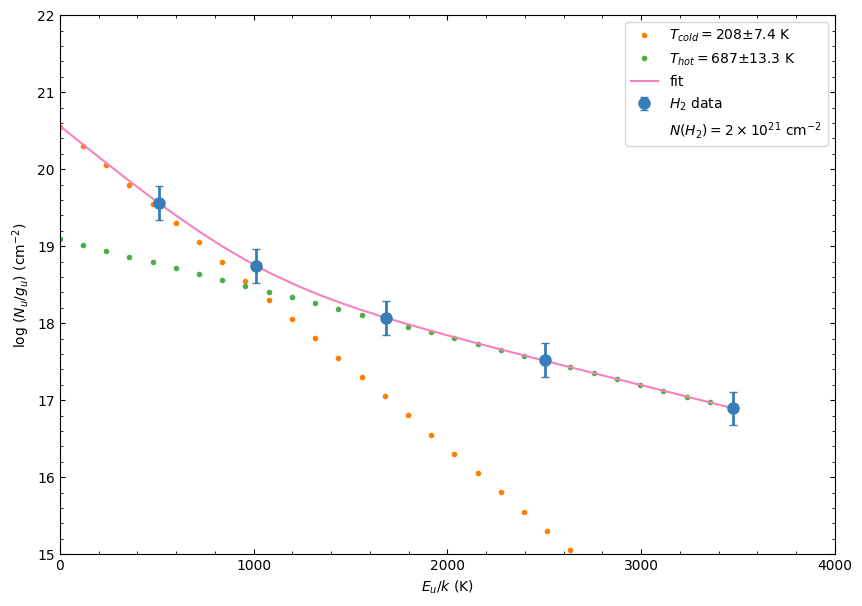

In [5]:
# Use the corresponding ExcitationPlot tool to visualize the fit
plot = ExcitationPlot(tool=h, label='H_2')

plot.ex_diagram(show_fit=True)
plot.savefig("ex_fig")